In [3]:
from huggingface_hub import list_datasets

all_datasets=[ds.id for ds in list_datasets()]
print(f"ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî {len(all_datasets)}Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.")
print(f"Ï≤òÏùå 10Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖã : {all_datasets[:10]}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî 149044Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.
Ï≤òÏùå 10Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖã : ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [1]:
!pip install datasets
from datasets import load_dataset

# "emotion" Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
emotions = load_dataset("emotion")

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ Ï∂úÎ†•
print(emotions)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train_ds=emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

In [ ]:
train_ds[0]

In [ ]:
print(train_ds.features)

In [3]:
import pandas as pd

emotions.set_format(type="pandas")
df=emotions["train"][:]
df.head(n=10)

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
5  ive been feeling a little burdened lately wasn...      0
6  ive been taking or milligrams or times recomme...      5
7  i feel as confused about life as a teenager or...      4
8  i have been with petronas for years i feel tha...      1
9                                i feel romantic too      2

In [4]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)
df.head(n=10)

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger
5  ive been feeling a little burdened lately wasn...      0    sadness
6  ive been taking or milligrams or times recomme...      5   surprise
7  i feel as confused about life as a teenager or...      4       fear
8  i have been with petronas for years i feel tha...      1        joy
9                                i feel romantic too      2       love

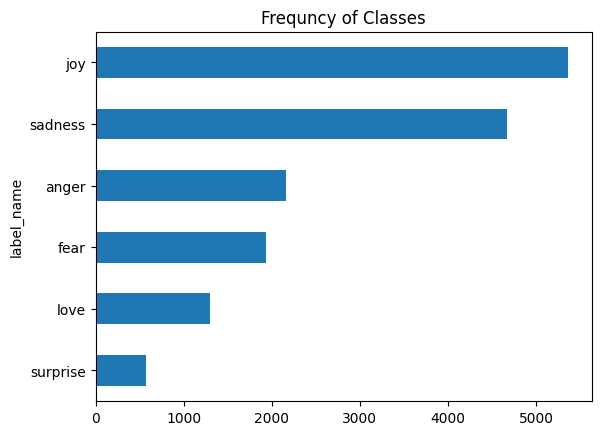

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequncy of Classes")
plt.show()

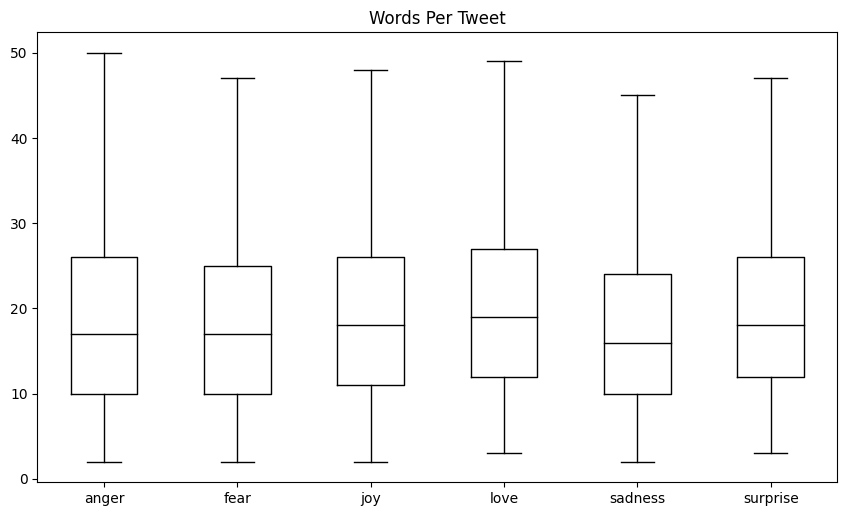

In [ ]:
df["Words Per Tweet"]=df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, figsize=(10,6),color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
emotions.reset_format()

In [ ]:
from transformers import AutoTokenizer

model_checkpoint="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text="This is OSSP project!!"
encoded_text=tokenizer(text)
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)


['[CLS]', 'this', 'is', 'os', '##sp', 'project', '!', '!', '[SEP]']


In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

emotions_encoded=emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModel
import torch

model_ckpt="distilbert-base-uncased"
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
text="This is OSSP project!!"
inputs=tokenizer(text, return_tensors="pt")
print(f"ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ : {inputs['input_ids'].size()}")

ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ : torch.Size([1, 9])


In [ ]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.0487, -0.1781,  0.1206,  ..., -0.1821,  0.2511,  0.4629],
         [-0.4378, -0.5580,  0.0774,  ..., -0.4897,  0.4643,  0.2860],
         [-0.3811, -0.3867,  0.2719,  ..., -0.1304,  0.3742,  0.8226],
         ...,
         [ 0.2097, -0.1491,  0.2754,  ...,  0.0782,  0.0489,  0.1769],
         [ 0.0160, -0.3612,  0.0923,  ...,  0.1112,  0.0344,  0.0661],
         [ 0.7826,  0.1128, -0.4700,  ...,  0.1986, -0.6693, -0.3002]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 9, 768])

In [ ]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
  inputs={k:v.to(device) for k,v in batch.items()
      if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state=model(**inputs).last_hidden_state
  return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}


In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden=emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

X_train=np.array(emotions_hidden["train"]["hidden_state"])
X_valid=np.array(emotions_hidden["validation"]["hidden_state"])
y_train=np.array(emotions_hidden["train"]["label"])
y_valid=np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
import pandas as pd
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# X_trainÍ≥º y_trainÏùÑ ÏòàÏ†úÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
X_scaled = MinMaxScaler().fit_transform(X_train)

# UMAP Ï†ÅÏö©
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train

# Í≤∞Í≥º Ï∂úÎ†•
print(df_emb.head())


ModuleNotFoundError: No module named 'umap'

NameError: name 'df_emb' is not defined

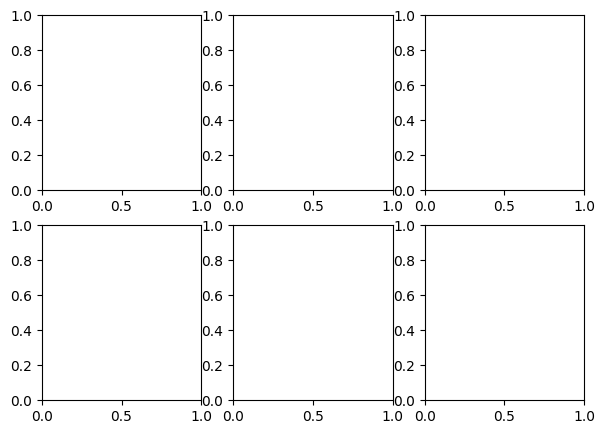

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,5))
axes=axes.flatten()
cmaps=["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels=emotions["train"].features["label"].names

for i, (label,cmap) in enumerate(zip(labels,cmaps)):
  df_emb_sub=df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"],cmap=cmap,gridsize=20,linewidth=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_valid,y_valid)

0.634

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid,y_valid)

0.352

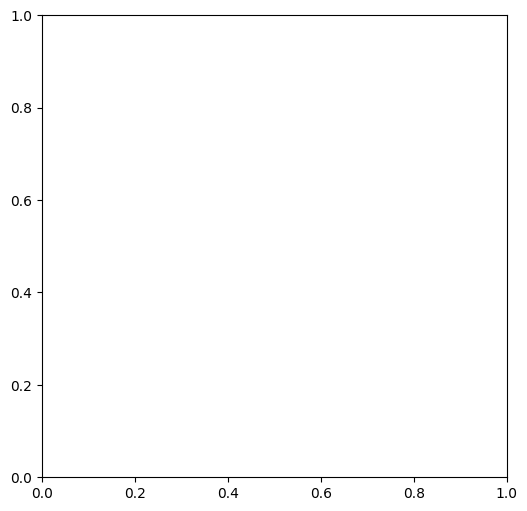

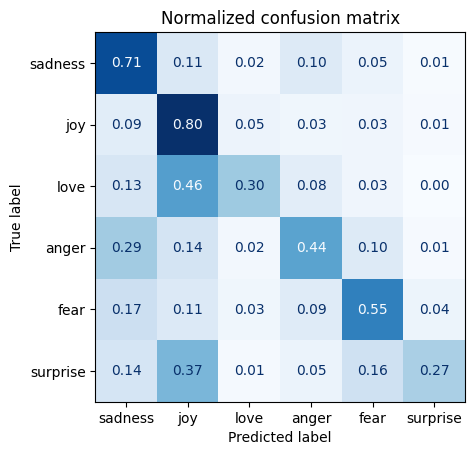

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

def plot_confusion_matrix(y_preds,y_true,labels):
  cm=confusion_matrix(y_true,y_preds,normalize="true")
  fig,ax=plt.subplots(figsize=(6,6))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap="Blues",values_format=".2f",colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds=lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds,y_valid,labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels=6
model=AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:


# Hugging Face Hub Î°úÍ∑∏Ïù∏
from huggingface_hub import notebook_login
notebook_login()


In [ ]:

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

emotions = load_dataset("emotion")

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î∞è Î™®Îç∏ ÏÑ§Ï†ï
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=6).to(device)

# ÌÜ†ÌÅ∞Ìôî Ìï®Ïàò Ï†ïÏùò
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜ†ÌÅ∞Ìôî
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

# Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÏãù ÏÑ§Ï†ï
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# ÌõàÎ†® Î∞è ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑ§Ï†ï
train_dataset = emotions_encoded["train"]
eval_dataset = emotions_encoded["validation"]

# TrainingArguments ÏÑ§Ï†ï
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,  # Î™®Îç∏ÏùÑ ÌóàÎ∏åÏóê ÏóÖÎ°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ï
)

# Trainer ÏÑ§Ï†ï
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,

)

# Î™®Îç∏ ÌõàÎ†®
trainer.train()

# Î™®Îç∏ ÌóàÎ∏åÏóê ÏóÖÎ°úÎìú
trainer.push_to_hub(commit_message="Training completed!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Some weig

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


events.out.tfevents.1716110367.fa6f5f39d06e.3829.0:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/forwarder1121/results/commit/950a09bc28674ab047a8e07df2dc7b5f110cc039', commit_message='Training completed!', commit_description='', oid='950a09bc28674ab047a8e07df2dc7b5f110cc039', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
model_id="forwarder1121/results"
classifier=pipeline("text-classification",model=model_id)

custom_text="OSSP is so funny"
preds=classifier(custom_text,top_k=None)

preds_sorted=sorted(preds,key=lambda d: d["label"])
preds_df=pd.DataFrame(preds_sorted)


In [ ]:
from transformers import AutoTokenizer

# Î™®Îç∏ Í≤ΩÎ°ú
model_checkpoint = "distilbert-base-uncased"
save_directory = "./tokenizer"

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú Î∞è Ï†ÄÏû•
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
tokenizer.save_pretrained(save_directory)


('./tokenizer/tokenizer_config.json',
 './tokenizer/special_tokens_map.json',
 './tokenizer/vocab.txt',
 './tokenizer/added_tokens.json',
 './tokenizer/tokenizer.json')

In [ ]:
from huggingface_hub import HfApi, HfFolder

# Hugging Face HubÏóê Î°úÍ∑∏Ïù∏
api = HfApi()
token = HfFolder.get_token()  # Ïù¥ÎØ∏ Î°úÍ∑∏Ïù∏Ìïú Í≤ΩÏö∞ ÌÜ†ÌÅ∞ÏùÑ Í∞ÄÏ†∏Ïò¥

# Î™®Îç∏ Ï†ÄÏû•ÏÜå Ï†ïÎ≥¥
model_id = "forwarder1121/results"
save_directory = "./tokenizer"

# ÌååÏùº ÏóÖÎ°úÎìú
api.upload_folder(
    folder_path=save_directory,
    path_in_repo="",
    repo_id=model_id,
    repo_type="model",
    token=token
)


CommitInfo(commit_url='https://huggingface.co/forwarder1121/results/commit/2335cf403fe774c6f020d2ab3c83e0877160b3f0', commit_message='Upload folder using huggingface_hub', commit_description='', oid='2335cf403fe774c6f020d2ab3c83e0877160b3f0', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
!python --version

Python 3.10.12


In [6]:
import json
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from huggingface_hub import HfApi, hf_hub_download

# 1. Î†àÏù¥Î∏î Ïù¥Î¶Ñ Ï†ÄÏû•
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]
label_names_path = "label_names.json"
with open(label_names_path, "w") as f:
    json.dump(label_names, f)

# 2. Î™®Îç∏ ID ÏÑ§Ï†ï
model_id = "forwarder1121/results"

# 3. Î†àÏù¥Î∏î Ïù¥Î¶Ñ ÌååÏùº ÏóÖÎ°úÎìú
api = HfApi()
api.upload_file(
    path_or_fileobj=label_names_path,
    path_in_repo="label_names.json",
    repo_id=model_id,
    repo_type="model",
)

# 4. Î™®Îç∏ Îã§Ïãú ÏóÖÎ°úÎìú
model = AutoModelForSequenceClassification.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
model.push_to_hub(model_id)
tokenizer.push_to_hub(model_id)

# 5. Î™®Îç∏ Î∞è Î†àÏù¥Î∏î Ïù¥Î¶Ñ Î°úÎìú
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
label_names_path = hf_hub_download(repo_id=model_id, filename="label_names.json")
with open(label_names_path, "r") as f:
    label_names = json.load(f)

# Î†àÏù¥Î∏î Ïù¥Î¶Ñ Î≥ÄÌôò Ìï®Ïàò
def get_label_name(label_index):
    return label_names[label_index]

# Î∂ÑÎ•ò ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# ÌÖåÏä§Ìä∏ Î¨∏Ïû•
custom_text = "OSSP is very funny"
result = classifier(custom_text)

# Í≤∞Í≥º Ï∂úÎ†• (Í∞êÏ†ï Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò)
for res in result:
    label_index = int(res['label'].split('_')[-1])  # 'LABEL_0' ÌòïÌÉúÏóêÏÑú Ïà´Ïûê Î∂ÄÎ∂Ñ Ï∂îÏ∂ú
    res['label'] = get_label_name(label_index)
    print(f"Text: {custom_text}")
    print(f"Predicted Emotion: {res['label']}, with score: {res['score']:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

label_names.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

Text: OSSP is very funny
Predicted Emotion: surprise, with score: 0.7579


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from huggingface_hub import hf_hub_download, HfApi
import json

# 1. Î†àÏù¥Î∏î Ïù¥Î¶Ñ Ï†ÄÏû•
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]
label_names_path = "label_names.json"
with open(label_names_path, "w") as f:
    json.dump(label_names, f)

# 2. Î™®Îç∏ ID ÏÑ§Ï†ï
model_id = "forwarder1121/results"

# 3. Î†àÏù¥Î∏î Ïù¥Î¶Ñ ÌååÏùº ÏóÖÎ°úÎìú
api = HfApi()
api.upload_file(
    path_or_fileobj=label_names_path,
    path_in_repo="label_names.json",
    repo_id=model_id,
    repo_type="model",
)

# 4. Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Îã§Ïãú ÏóÖÎ°úÎìú
model = AutoModelForSequenceClassification.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
model.push_to_hub(model_id)
tokenizer.push_to_hub(model_id)

# 5. Î™®Îç∏ Î∞è Î†àÏù¥Î∏î Ïù¥Î¶Ñ Î°úÎìú
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
label_names_path = hf_hub_download(repo_id=model_id, filename="label_names.json")
with open(label_names_path, "r") as f:
    label_names = json.load(f)

# Î†àÏù¥Î∏î Ïù¥Î¶Ñ Î≥ÄÌôò Ìï®Ïàò
def get_label_name(label_index):
    return label_names[label_index]

# Î∂ÑÎ•ò ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# ÌÖåÏä§Ìä∏ Î¨∏Ïû•
custom_text = "I like you. I love you"
results = classifier(custom_text)

# Í≤∞Í≥º Ï∂úÎ†• (Í∞êÏ†ï Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò)
for res in results:
    label_index = int(res['label'].split('_')[-1])  # 'LABEL_0' ÌòïÌÉúÏóêÏÑú Ïà´Ïûê Î∂ÄÎ∂Ñ Ï∂îÏ∂ú
    res['label'] = get_label_name(label_index)
    print(f"Text: {custom_text}")
    print(f"Predicted Emotion: {res['label']}, with score: {res['score']:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Text: I like you. I love you
Predicted Emotion: love, with score: 0.9278


In [10]:
import json
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import HfApi

# Î†àÏù¥Î∏î Ïù¥Î¶Ñ Ï†ïÏùò
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Î™®Îç∏ ID ÏÑ§Ï†ï
model_id = "forwarder1121/results"

# Î™®Îç∏ Íµ¨ÏÑ± Î°úÎìú
config = AutoConfig.from_pretrained(model_id)

# id2label Î∞è label2id Ï∂îÍ∞Ä
id2label = {str(i): label for i, label in enumerate(label_names)}
label2id = {label: str(i) for i, label in enumerate(label_names)}
config.id2label = id2label
config.label2id = label2id

# ÏàòÏ†ïÎêú Íµ¨ÏÑ± Ï†ÄÏû•
config_path = "config.json"
with open(config_path, "w") as f:
    json.dump(config.to_dict(), f)

# Íµ¨ÏÑ± ÌååÏùº ÏóÖÎ°úÎìú
api = HfApi()
api.upload_file(
    path_or_fileobj=config_path,
    path_in_repo="config.json",
    repo_id=model_id,
    repo_type="model",
)

print(f"Updated config.json uploaded to {model_id}.")


config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

Updated config.json uploaded to forwarder1121/results.


In [11]:
# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model = AutoModelForSequenceClassification.from_pretrained(model_id, config=config)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Îã§Ïãú ÏóÖÎ°úÎìú
model.push_to_hub(model_id)
tokenizer.push_to_hub(model_id)

print(f"Model and tokenizer pushed to {model_id}.")


Model and tokenizer pushed to forwarder1121/results.


In [13]:
import json
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import HfApi

# Î†àÏù¥Î∏î Ïù¥Î¶Ñ Ï†ïÏùò
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Î™®Îç∏ ID ÏÑ§Ï†ï
model_id = "forwarder1121/results"

# Î™®Îç∏ Íµ¨ÏÑ± Î°úÎìú
config = AutoConfig.from_pretrained(model_id)

# id2label Î∞è label2id Ï∂îÍ∞Ä
id2label = {str(i): label for i, label in enumerate(label_names)}
label2id = {label: str(i) for i, label in enumerate(label_names)}
config.id2label = id2label
config.label2id = label2id

# ÏàòÏ†ïÎêú Íµ¨ÏÑ± Ï†ÄÏû•
config_path = "config.json"
with open(config_path, "w") as f:
    json.dump(config.to_dict(), f)

# Íµ¨ÏÑ± ÌååÏùº ÏóÖÎ°úÎìú
api = HfApi()
api.upload_file(
    path_or_fileobj=config_path,
    path_in_repo="config.json",
    repo_id=model_id,
    repo_type="model",
)

print(f"Updated config.json uploaded to {model_id}.")


Updated config.json uploaded to forwarder1121/results.


In [14]:
# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model = AutoModelForSequenceClassification.from_pretrained(model_id, config=config)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Îã§Ïãú ÏóÖÎ°úÎìú
model.push_to_hub(model_id)
tokenizer.push_to_hub(model_id)

print(f"Model and tokenizer pushed to {model_id}.")


Model and tokenizer pushed to forwarder1121/results.


In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_id = "forwarder1121/results"

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

# Î∂ÑÎ•ò ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# ÌÖåÏä§Ìä∏ Î¨∏Ïû•
custom_text = "OSSP is very funny"
result = classifier(custom_text)

# Í≤∞Í≥º Ï∂úÎ†• (Í∞êÏ†ï Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò)
for res in result:
    print(f"Text: {custom_text}")
    print(f"Predicted Emotion: {res['label']}, with score: {res['score']:.4f}")


Text: OSSP is very funny
Predicted Emotion: surprise, with score: 0.7579


In [16]:
import json
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import HfApi

# Î†àÏù¥Î∏î Ïù¥Î¶Ñ Ï†ïÏùò
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Î™®Îç∏ ID ÏÑ§Ï†ï
model_id = "forwarder1121/results"

# Î™®Îç∏ Íµ¨ÏÑ± Î°úÎìú
config = AutoConfig.from_pretrained(model_id)

# id2label Î∞è label2id Ï∂îÍ∞Ä
id2label = {str(i): label for i, label in enumerate(label_names)}
label2id = {label: str(i) for i, label in enumerate(label_names)}
config.id2label = id2label
config.label2id = label2id

# ÏàòÏ†ïÎêú Íµ¨ÏÑ± Ï†ÄÏû•
config_path = "config.json"
with open(config_path, "w") as f:
    json.dump(config.to_dict(), f)

# Íµ¨ÏÑ± ÌååÏùº ÏóÖÎ°úÎìú
api = HfApi()
api.upload_file(
    path_or_fileobj=config_path,
    path_in_repo="config.json",
    repo_id=model_id,
    repo_type="model",
)

print(f"Updated config.json uploaded to {model_id}.")


Updated config.json uploaded to forwarder1121/results.


In [17]:
# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model = AutoModelForSequenceClassification.from_pretrained(model_id, config=config)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Îã§Ïãú ÏóÖÎ°úÎìú
model.push_to_hub(model_id)
tokenizer.push_to_hub(model_id)

print(f"Model and tokenizer pushed to {model_id}.")


Model and tokenizer pushed to forwarder1121/results.


In [19]:
from transformers import pipeline

model_id = "forwarder1121/results"

# Î∂ÑÎ•ò ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
classifier = pipeline("text-classification", model=model_id, tokenizer=model_id)

# ÌÖåÏä§Ìä∏ Î¨∏Ïû•
custom_text = "love love"
result = classifier(custom_text)

# Í≤∞Í≥º Ï∂úÎ†• (Í∞êÏ†ï Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò)
for res in result:
    print(f"Text: {custom_text}")
    print(f"Predicted Emotion: {res['label']}, with score: {res['score']:.4f}")


Text: love love
Predicted Emotion: love, with score: 0.8155


In [1]:
!pip install transformers accelerate -q
!pip install git+https://github.com/huggingface/diffusers@@shap-ee


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302.6/302.6 kB 4.8 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers@ (to revision shap-ee) to /tmp/pip-req-build-uoey4bsn
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers@ /tmp/pip-req-build-uoey4bsn
  remote: Repository not found.
  fatal: repository 'https://github.com/huggingface/diffusers@/' not found
  error: subprocess-exited-with-error
  
  √ó git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers@ /tmp/pip-req-build-uoey4bsn did not run successfully.
  ‚îÇ exit code: 128
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

√ó git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers@ /tmp/pip-req-build-uoey4bsn did not run successfully.
‚îÇ ex